In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)

In [5]:
from sklearn.model_selection import cross_validate

cv_dt = cross_validate(
    dt,
    data,
    target,
    cv=10,
    return_train_score=True,
    scoring='neg_mean_absolute_error'
)

cv_rf = cross_validate(
    rf,
    data,
    target,
    cv=10,
    return_train_score=True,
    scoring='neg_mean_absolute_error'
)

In [7]:
-cv_dt['test_score'] > -cv_rf['test_score']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [13]:
cv_rf_5 = cross_validate(
    RandomForestRegressor(random_state=0, n_estimators=5),
    data,
    target,
    cv=10,
    return_train_score=True,
    scoring='neg_mean_absolute_error'
)

cv_rf_10 = cross_validate(
    RandomForestRegressor(random_state=0, n_estimators=100),
    data,
    target,
    cv=10,
    return_train_score=True,
    scoring='neg_mean_absolute_error'
)

In [14]:
-cv_rf_5['test_score'] > -cv_rf_10['test_score']

array([ True,  True,  True,  True, False, False,  True,  True, False,
        True])

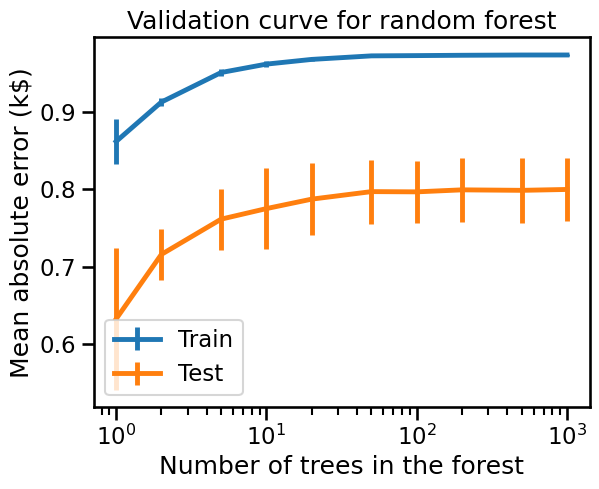

In [25]:
import numpy as np
n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

from sklearn.model_selection import ValidationCurveDisplay

disp = ValidationCurveDisplay.from_estimator(
    RandomForestRegressor(random_state=0),
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    #scoring="neg_mean_absolute_error",
    scoring="r2", 
    score_name="R2 score",
    #negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees in the forest",
    ylabel="Mean absolute error (k$)",
    title="Validation curve for random forest",
)


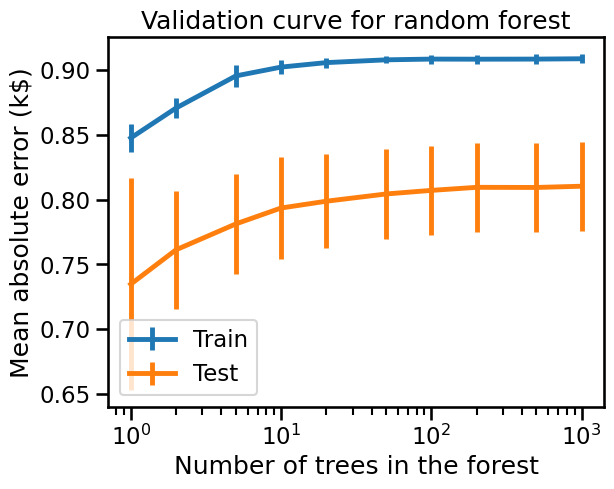

In [26]:
#from sklearn.model_selection import ValidationCurveDisplay

disp = ValidationCurveDisplay.from_estimator(
    RandomForestRegressor(random_state=0, max_depth=5),
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    #scoring="neg_mean_absolute_error",
    scoring="r2", 
    score_name="R2 score",
    #negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees in the forest",
    ylabel="Mean absolute error (k$)",
    title="Validation curve for random forest",
)

In [18]:
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

In [19]:
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

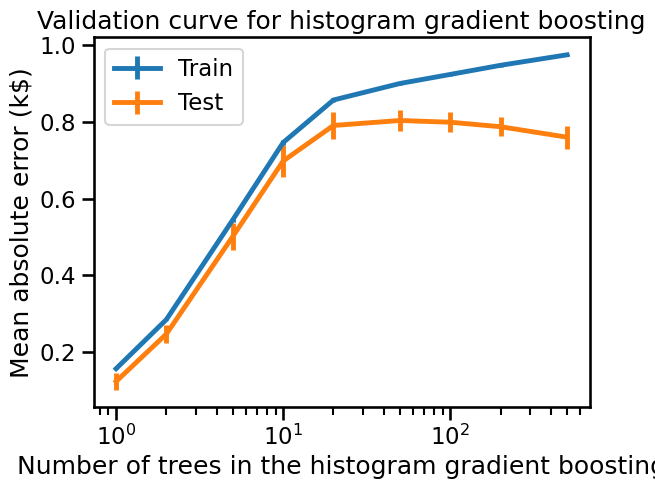

In [27]:
max_iters = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

from sklearn.ensemble import HistGradientBoostingRegressor

disp = ValidationCurveDisplay.from_estimator(
    HistGradientBoostingRegressor(random_state=0),
    data,
    target,
    param_name="max_iter",
    param_range=max_iters,
    #scoring="neg_mean_absolute_error",
    scoring="r2", 
    score_name="R2 score",
    #negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Number of trees in the histogram gradient boosting",
    ylabel="Mean absolute error (k$)",
    title="Validation curve for histogram gradient boosting",
)